In [2]:
# for multiple stocks 
import datetime as dt
import pandas as pd
import yfinance as yf
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="15m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-05-14 14:00:00,22258.650391,22269.949219,22246.000000,22250.849609,22250.849609,0
2024-05-14 14:15:00,22250.699219,22266.400391,22217.699219,22256.599609,22256.599609,0
2024-05-14 14:30:00,22256.300781,22259.750000,22226.150391,22236.900391,22236.900391,0
2024-05-14 14:45:00,22236.250000,22248.550781,22228.199219,22236.750000,22236.750000,0
2024-05-14 15:00:00,22233.900391,22233.900391,22233.900391,22233.900391,22233.900391,0


### MACD = Moving Average Convergence Divergence

In [18]:
def macd(DF,fast_length=12,slow_length=26,signal_smoothing=9):
    df= DF.copy()
    df["ma_fast"]=df["Adj Close"].ewm(span=fast_length,min_periods=fast_length).mean()
    df["ma_slow"]=df["Adj Close"].ewm(span=slow_length,min_periods=slow_length).mean()
    df["macd"]= df["ma_fast"]-df["ma_slow"]
    df["signal"] = df["macd"].ewm(span=signal_smoothing,min_periods=signal_smoothing).mean()
    return df.loc[:,["macd","signal"]]

for ticker in ohlcv:
    ohlcv[ticker][["MACD","SIGNAL"]]= macd(ohlcv[ticker])    


In [19]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,SIGNAL
Datetime,,,,,,,,
2024-05-14 14:00:00,22258.650391,22269.949219,22246.000000,22250.849609,22250.849609,0,47.529278,44.465547
2024-05-14 14:15:00,22250.699219,22266.400391,22217.699219,22256.599609,22256.599609,0,47.546763,45.081790
2024-05-14 14:30:00,22256.300781,22259.750000,22226.150391,22236.900391,22236.900391,0,45.447171,45.154867
2024-05-14 14:45:00,22236.250000,22248.550781,22228.199219,22236.750000,22236.750000,0,43.272279,44.778349
2024-05-14 15:00:00,22233.900391,22233.900391,22233.900391,22233.900391,22233.900391,0,40.847852,43.992250


NIFTY MACD AT 2:45pm
MACD= 43.27:
We got MACD= 43.2 and Signal=44.7

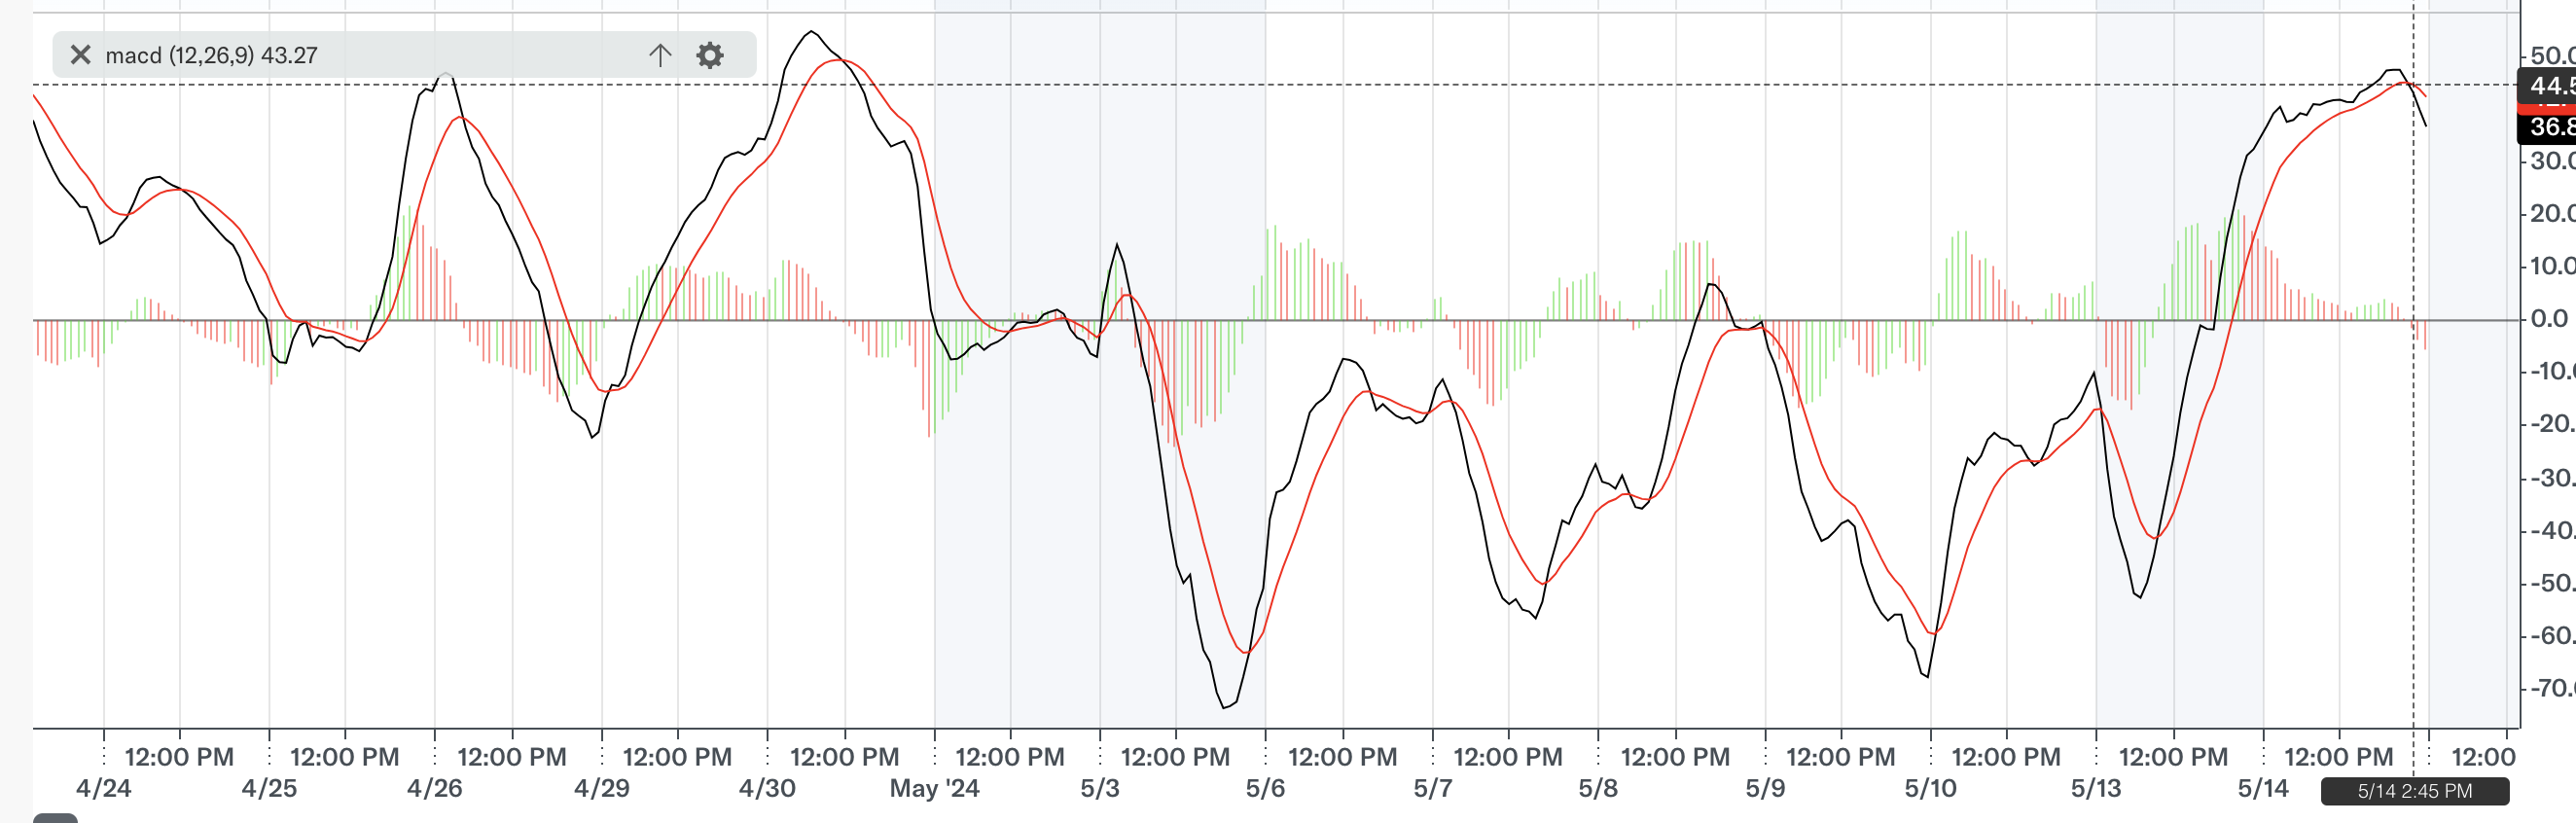

### Bolinger Bands and ATR(Average True Range)

ATR formula:

The Current Period High minus (-) Current Period Low

The Absolute Value (abs) of the Current Period High minus (-) The Previous Period Close

The Absolute Value (abs) of the Current Period Low minus (-) The Previous Period Close

true range = max[(high - low), abs(high - previous close), abs (low - previous close)]

In [26]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="15m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
def atr(DF,window=14):
    df=DF.copy()
    df["h-l"]=df["High"]-df["Low"]
    df["h-PC"]=df["High"]-df["Adj Close"].shift(1)
    df["l-PC"]=df["Low"]-df["Adj Close"].shift(1)
    df["tr"]=df[["h-l","h-PC","l-PC"]].max(axis=1,skipna=False)

    df["atr"]=df["tr"].ewm(com=window,min_periods=window).mean()
    return df["atr"]



for ticker in ohlcv:
    ohlcv[ticker]["ATR"]= atr(ohlcv[ticker]) 

In [36]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2024-05-15 14:15:00,22210.400391,22215.449219,22182.150391,22190.650391,22190.650391,0,35.546307
2024-05-15 14:30:00,22192.949219,22217.949219,22184.550781,22202.449219,22202.449219,0,35.403116
2024-05-15 14:45:00,22201.849609,22227.949219,22201.050781,22224.349609,22224.349609,0,34.836137
2024-05-15 15:00:00,22221.949219,22233.550781,22183.449219,22205.050781,22205.050781,0,35.853832
2024-05-15 15:15:00,22203.449219,22214.949219,22188.900391,22210.400391,22210.400391,0,35.200165


ATR we got at 3:15= 35.2
From yFinance= 35.05

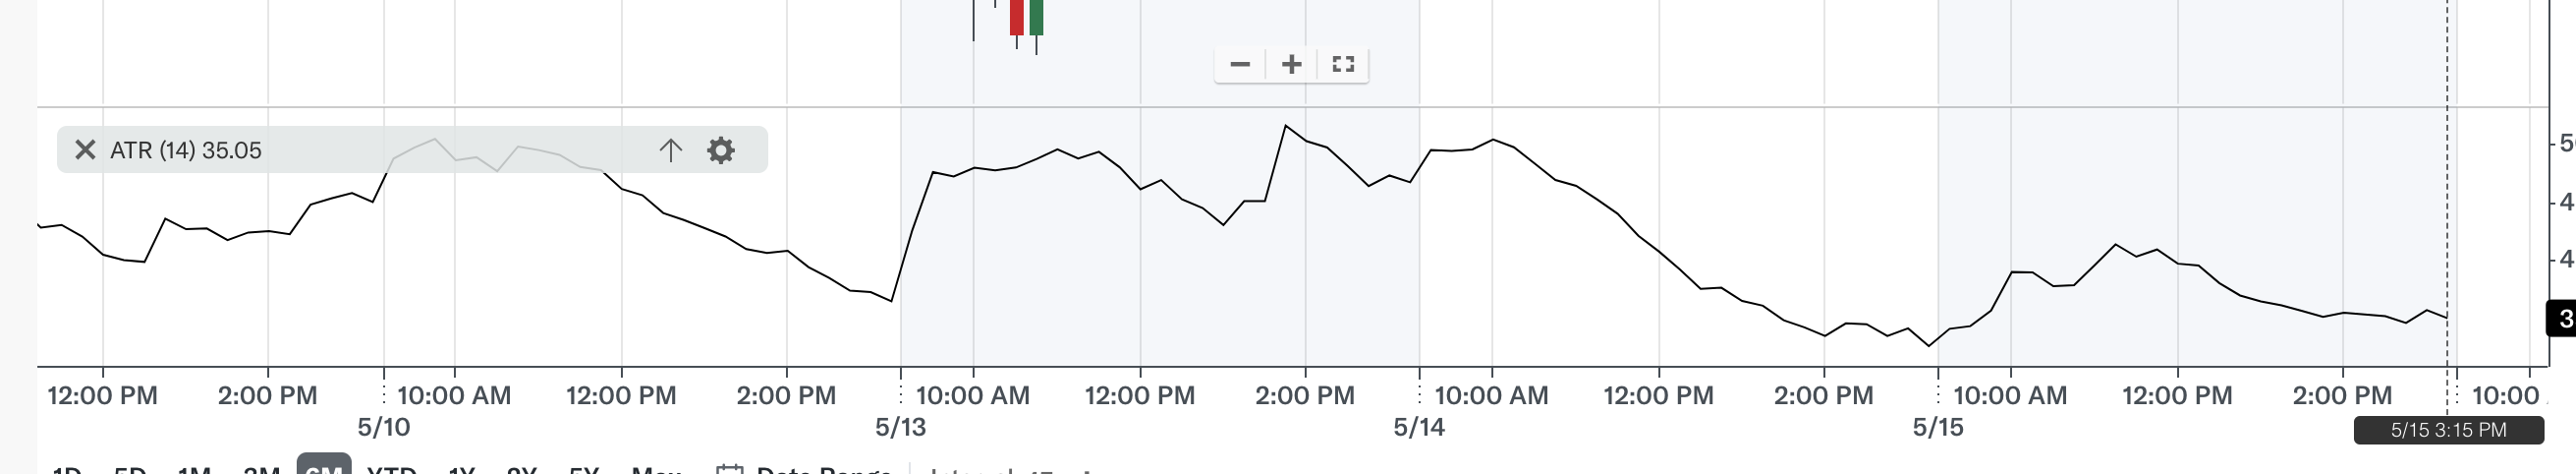

### For Bolinger lets get 5min data interval

In [37]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="5m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Bollinger bands formula:

Middle Band – 20 Day Simple Moving Average

Upper Band – 20 Day Simple Moving Average + (Standard Deviation x 2)

Lower Band – 20 Day Simple Moving Average - (Standard Deviation x 2)


In [43]:
def bb_bands(DF,window=14):
    df= DF.copy()
    df["mb"]=df["Adj Close"].rolling(window).mean()
    #here degree of freedom while calculating sd needs to be n and not n-1 as we are doint it over a population and a sample
    #default ddof=1
    df["upperband"]=df["mb"] + 2*df["Adj Close"].rolling(window).std(ddof=0)
    df["lowerband"]=df["mb"] - 2*df["Adj Close"].rolling(window).std(ddof=0)
    df["bb_width"]=df["upperband"]-df["lowerband"]
    return df[["mb","upperband","lowerband","bb_width"]]

In [44]:
for ticker in ohlcv:
    ohlcv[ticker][["mb","upperband","lowerband","bb_width"]]= bb_bands(ohlcv[ticker])

In [46]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,mb,upperband,lowerband,bb_width
Datetime,,,,,,,,,,
2024-05-15 15:05:00+05:30,22188.949219,22206.000000,22183.449219,22206.000000,22206.000000,0,22203.724749,22228.169233,22179.280265,48.888968
2024-05-15 15:10:00+05:30,22205.949219,22211.949219,22196.599609,22205.050781,22205.050781,0,22204.753348,22228.097800,22181.408896,46.688904
2024-05-15 15:15:00+05:30,22203.449219,22205.400391,22188.900391,22193.800781,22193.800781,0,22204.571289,22228.212923,22180.929655,47.283267
2024-05-15 15:20:00+05:30,22193.500000,22201.300781,22191.050781,22199.449219,22199.449219,0,22203.714146,22227.165542,22180.262750,46.902792
2024-05-15 15:25:00+05:30,22199.900391,22214.949219,22199.349609,22210.400391,22210.400391,0,22204.789202,22227.986787,22181.591617,46.395170


Bollinger bands  at 5:25 for Nifty were:

Middle band at= 22204.79, we got it at 22204.789
Upper band at= 22227.99, we got it at 22227.98967
lower band at= 22181.59 we got it at 22181.591

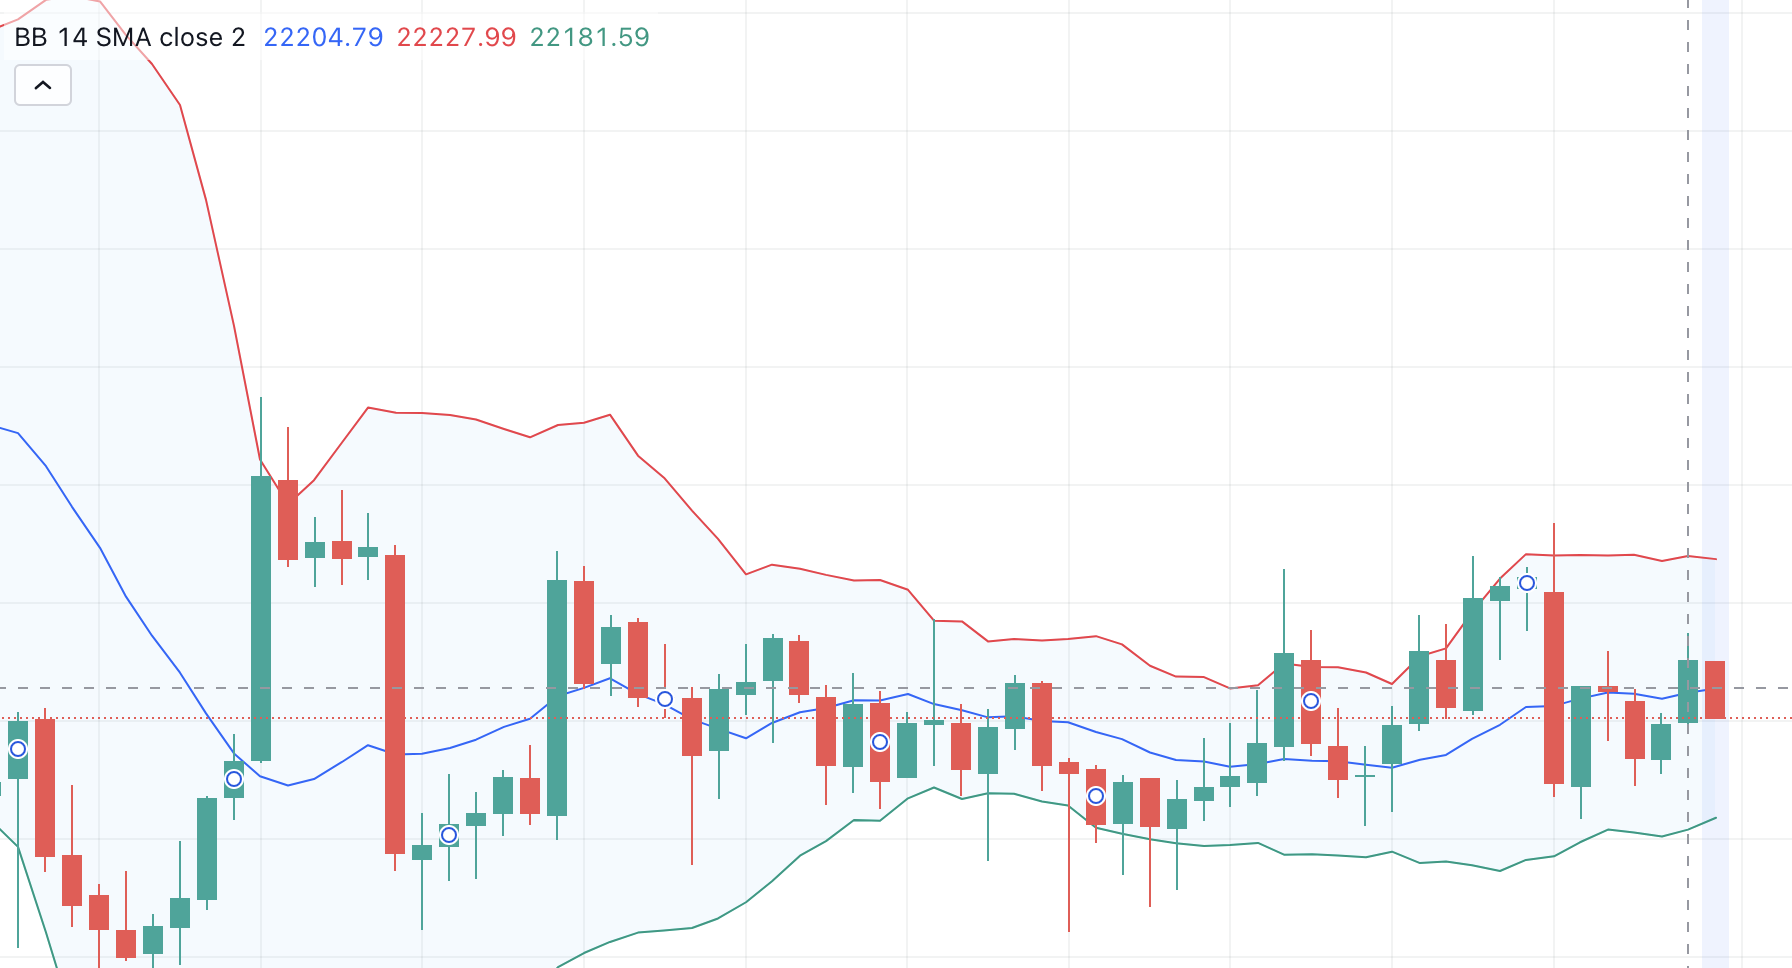

### RSI Relative Strength Index


RSI = 100 – 100/ (1 + RS)

RS = Average Gain of n days UP  / Average Loss of n days DOWN

In [47]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="5m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [49]:
import numpy as np
def RSI(DF,window=14):
    df = DF.copy()
    df["change"] = df["Adj Close"] - df["Adj Close"].shift(1)
    df["gain"] = np.where(df["change"]>=0,df["change"],0)
    df["loss"] = np.where(df["change"]<0,-1*df["change"],0)
    df["avggain"] = df["gain"].ewm(alpha=1/window,min_periods=window).mean()
    df["avgloss"] = df["loss"].ewm(alpha=1/window,min_periods=window).mean()
    df["rs"]=df["avggain"]/df["avgloss"]
    df["rsi"] = 100 -(100/(1+df["rs"]))
    return df["rsi"]


In [50]:
for ticker in ohlcv:
    ohlcv[ticker]["rsi"]= RSI(ohlcv[ticker])

In [51]:
ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,rsi
Datetime,,,,,,,
2024-05-15 15:05:00+05:30,22188.949219,22206.000000,22183.449219,22206.000000,22206.000000,0,51.428801
2024-05-15 15:10:00+05:30,22205.949219,22211.949219,22196.599609,22205.050781,22205.050781,0,51.072802
2024-05-15 15:15:00+05:30,22203.449219,22205.400391,22188.900391,22193.800781,22193.800781,0,46.926759
2024-05-15 15:20:00+05:30,22193.500000,22201.300781,22191.050781,22199.449219,22199.449219,0,49.158398
2024-05-15 15:25:00+05:30,22199.900391,22214.949219,22199.349609,22210.400391,22210.400391,0,53.261740


at 3:20 the RSI for NIFTY was: 49.15 and we got 49.158

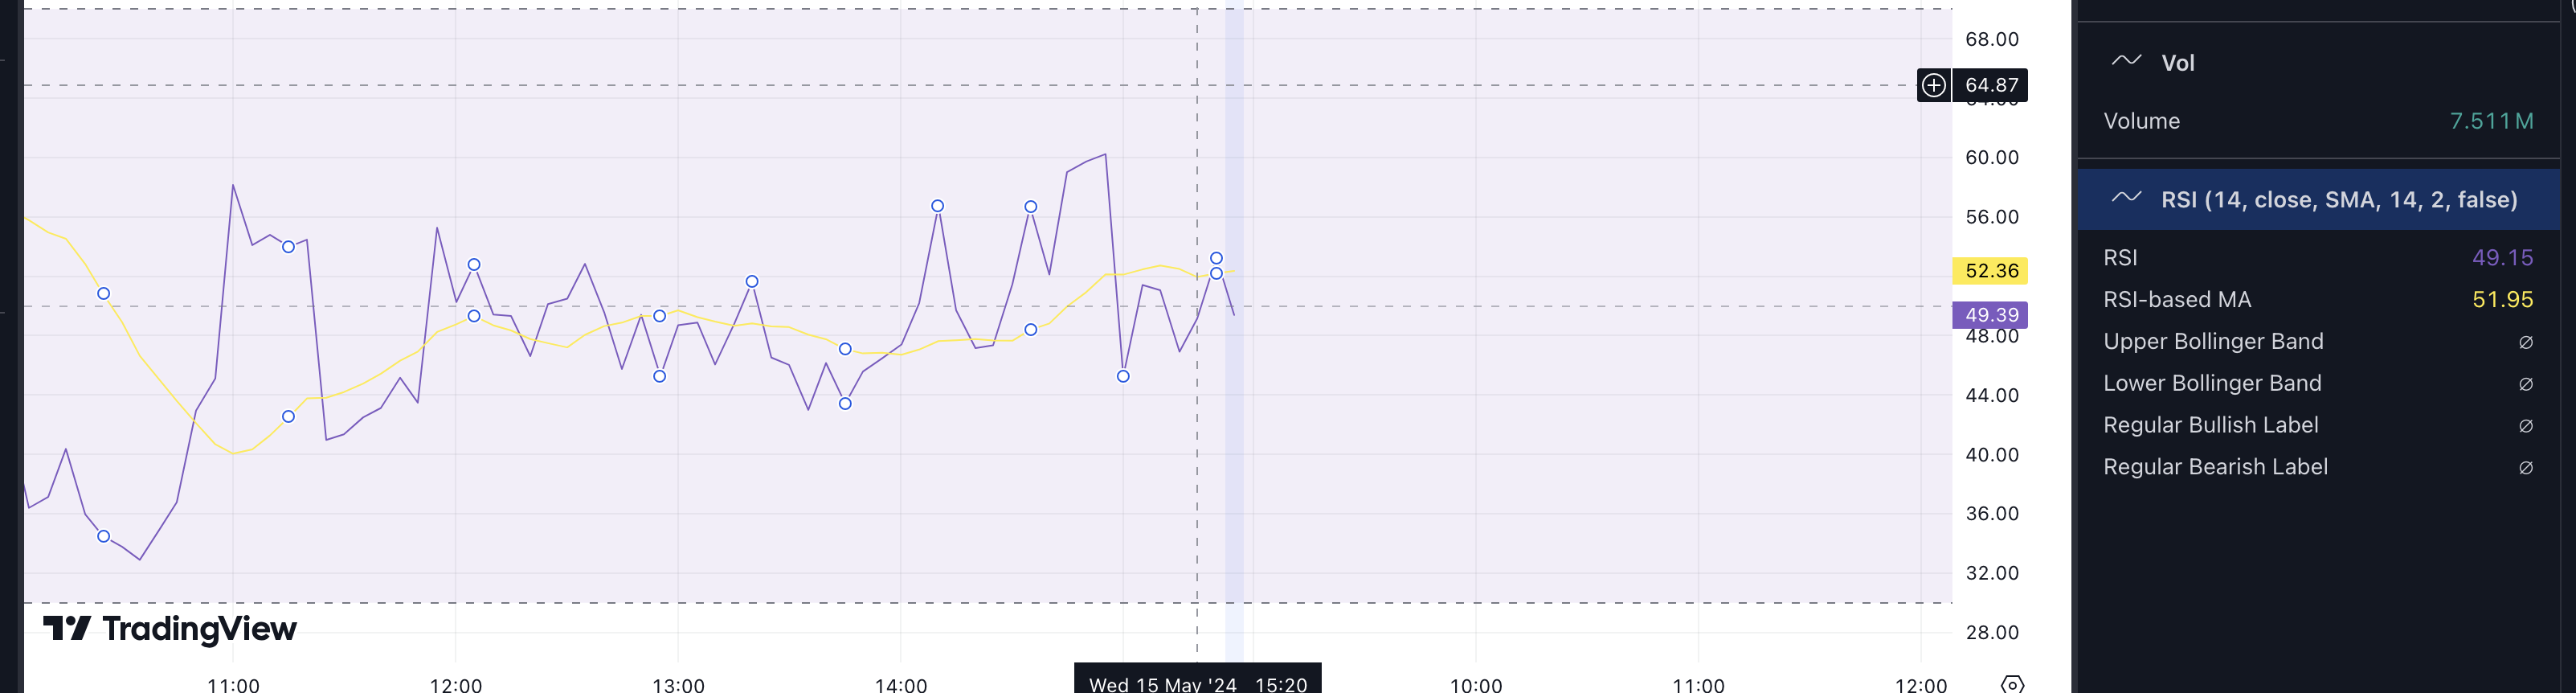

## ADX: Average Directional Index

How to calculate

Current High - Previous High = UpMove

Previous Low - Current Low = DownMove

If UpMove > DownMove and UpMove > 0, then +DM = UpMove, else +DM = 0

If DownMove > Upmove and Downmove > 0, then -DM = DownMove, else -DM = 0

Once you have the current +DM and -DM calculated, the +DM and -DM lines can be calculated and plotted based on the number of user defined periods.

+DI = 100 times Exponential Moving Average of (+DM / Average True Range)

-DI = 100 times Exponential Moving Average of (-DM / Average True Range)

Now that -+DX and -DX have been calculated, the last step is calculating the ADX.

ADX = 100 times the Exponential Moving Average of the Absolute Value of (+DI - -DI) / (+DI + -DI)

In [52]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}

for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="5m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [66]:
def ADX(DF,window=20):
    df= DF.copy()
    df["atr"] = atr(df,window)
    df["upmove"] = df["High"]-df["High"].shift(1)
    df["downmove"] = df["Low"].shift(1)-df["Low"]

    df["+DM"]=np.where(((df["upmove"]>df["downmove"])&(df["upmove"]>0)),df["upmove"],0)

    df["-DM"]=np.where(((df["upmove"]<df["downmove"])&(df["downmove"]>0)),df["downmove"],0)

    df["+DI"] = 100 * (df["+DM"]/df["atr"]).ewm(com=window,min_periods=window).mean()
    df["-DI"] = 100 * (df["-DM"]/df["atr"]).ewm(com=window,min_periods=window).mean()
    
    df["ADX"] = 100 * abs((df["+DI"]-df["-DI"])/(df["+DI"]+df["-DI"])).ewm(com=window,min_periods=window).mean()

    return df["ADX"]

In [67]:
for ticker in ohlcv:
    ohlcv[ticker]["ADX"]= ADX(ohlcv[ticker])

ohlcv["^NSEI"].tail()

,Open,High,Low,Close,Adj Close,Volume,ADX
Datetime,,,,,,,
2024-05-15 15:05:00+05:30,22188.949219,22206.000000,22183.449219,22206.000000,22206.000000,0,11.635198
2024-05-15 15:10:00+05:30,22205.949219,22211.949219,22196.599609,22205.050781,22205.050781,0,11.223828
2024-05-15 15:15:00+05:30,22203.449219,22205.400391,22188.900391,22193.800781,22193.800781,0,11.052049
2024-05-15 15:20:00+05:30,22193.500000,22201.300781,22191.050781,22199.449219,22199.449219,0,10.888451
2024-05-15 15:25:00+05:30,22199.900391,22214.949219,22199.349609,22210.400391,22210.400391,0,10.457247


### Renko Chart

In [4]:
stocks=["^NSEI","GOOG","MSFT"]
ohlcv={}
hour_data={}
for ticker in stocks:
    temp=yf.download(tickers=ticker,period="1mo",interval="5m")
    temp.dropna(how="any",inplace=True)
    ohlcv[ticker]=temp
    temp2=yf.download(tickers=ticker,period="1y",interval="1h")
    temp2.dropna(how="any",inplace=True)
    hour_data[ticker]=temp2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
from stocktrends import Renko

def renko(DF,hour_data):
    df=DF.copy()
    df.drop("Close",axis=1,inplace=True)
    df.reset_index(inplace=True)
    df.columns=["date","open","high","low","close","volume"]
    df2= Renko(df)
    df2.brick_size= 3* round(atr(hour_data,120).iloc[-1],0)
    renko_df=df2.get_ohlc_data()
    return renko_df


In [9]:
renko_data={}
for ticker in ohlcv:
    renko_data[ticker]= renko(ohlcv[ticker],hour_data[ticker])

renko_data["^NSEI"]

,date,open,high,low,close,uptrend
0,2024-04-16 09:15:00+05:30,21825.0,22050.0,21825.0,22050.0,True
1,2024-04-18 11:10:00+05:30,22050.0,22275.0,22050.0,22275.0,True
2,2024-04-19 09:15:00+05:30,22050.0,22050.0,21825.0,21825.0,False
3,2024-04-22 10:55:00+05:30,22050.0,22275.0,22050.0,22275.0,True
4,2024-04-25 13:45:00+05:30,22275.0,22500.0,22275.0,22500.0,True
5,2024-04-30 09:50:00+05:30,22500.0,22725.0,22500.0,22725.0,True
6,2024-05-07 11:20:00+05:30,22500.0,22500.0,22275.0,22275.0,False
7,2024-05-09 12:55:00+05:30,22275.0,22275.0,22050.0,22050.0,False
